In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [40]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [41]:
df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
df.duplicated().sum()

0

In [44]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [45]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [46]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [47]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [48]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [50]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [51]:
X=df.drop(columns = ['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [52]:
X_train.shape

(8000, 11)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [54]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [55]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim =11))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [59]:
model.fit(X_train_scaled,y_train, epochs = 10)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5669
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4987
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4711
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4566
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4473
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4408
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4363
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4333
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4311
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4297


In [60]:
model.layers[0].get_weights()

[array([[-0.15393963, -0.17383958,  0.3013249 ],
        [-1.0702724 ,  0.79252416, -0.8055319 ],
        [ 0.1290961 ,  0.34308842,  0.26237386],
        [ 0.16374859,  0.50156915, -0.2446211 ],
        [ 0.5259448 , -0.04491073, -0.25428146],
        [-0.07001129, -0.3342438 , -0.10673422],
        [ 0.3247372 , -0.7822702 ,  0.8473245 ],
        [-0.0248201 , -0.2269642 , -0.2726604 ],
        [-0.7219677 ,  0.47472793, -0.01701813],
        [-0.33200327, -0.01919179,  0.35945702],
        [ 0.22140896, -0.46393466,  0.41234368]], dtype=float32),
 array([ 0.50548357, -0.36239034,  0.49301627], dtype=float32)]

In [61]:
model.layers[1].get_weights()

[array([[-1.6663443],
        [ 1.0278785],
        [-1.1895418]], dtype=float32),
 array([-0.3519123], dtype=float32)]

In [62]:
model.predict(X_test_scaled)

array([[0.10320428],
       [0.14367706],
       [0.12328556],
       ...,
       [0.05696034],
       [0.1334728 ],
       [0.33484206]], dtype=float32)

In [63]:
y_log = model.predict(X_test_scaled)

In [64]:
y_pred=np.where(y_log>0.5,1,0)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.812

In [65]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.812

In [87]:
import matplotlib.pyplot as plt

In [89]:
history.history

{'loss': [0.35287776589393616,
  0.3495998680591583,
  0.3465019166469574,
  0.34431037306785583,
  0.342675119638443,
  0.3411865532398224,
  0.3402068614959717,
  0.33882731199264526,
  0.3381229639053345,
  0.33828842639923096],
 'accuracy': [0.8560937643051147,
  0.859375,
  0.8584374785423279,
  0.8610937595367432,
  0.8614062666893005,
  0.8609374761581421,
  0.8617187738418579,
  0.8645312786102295,
  0.86328125,
  0.8628125190734863],
 'val_loss': [0.353026419878006,
  0.35090696811676025,
  0.35103678703308105,
  0.349396675825119,
  0.3488532602787018,
  0.34795665740966797,
  0.3474574387073517,
  0.3471928536891937,
  0.34796127676963806,
  0.3487747609615326],
 'val_accuracy': [0.8537499904632568,
  0.8556249737739563,
  0.8556249737739563,
  0.8556249737739563,
  0.8587499856948853,
  0.8587499856948853,
  0.8568750023841858,
  0.856249988079071,
  0.8556249737739563,
  0.8525000214576721]}

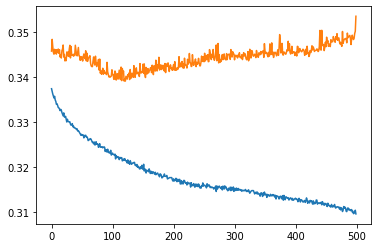

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

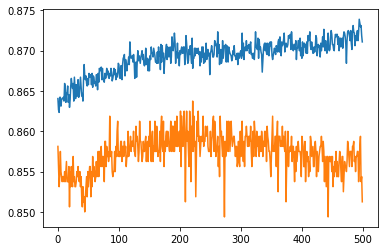

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [81]:
#To reduce loss
model = Sequential()

model.add(Dense(11,activation='relu',input_dim =11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_11 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [93]:
history = model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
200/200 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8641 - val_loss: 0.3458 - val_accuracy: 0.8581
Epoch 2/500
200/200 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8627 - val_loss: 0.3484 - val_accuracy: 0.8556
Epoch 3/500
200/200 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8623 - val_loss: 0.3468 - val_accuracy: 0.8531
Epoch 4/500
200/200 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8642 - val_loss: 0.3455 - val_accuracy: 0.8544
Epoch 5/500
200/200 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8642 - val_loss: 0.3451 - val_accuracy: 0.8575
Epoch 6/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8631 - val_loss: 0.3462 - val_accuracy: 0.8550
Epoch 7/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8639 - val_loss: 0.3453 - val_accuracy: 0.8544

In [94]:
model.layers[2].get_weights()

[array([[ 1.1159908 ],
        [ 1.0540284 ],
        [-0.733805  ],
        [-0.15930358],
        [ 1.15291   ],
        [-1.0894979 ],
        [-0.63506585],
        [ 1.1328847 ],
        [ 1.2473687 ],
        [ 1.239307  ],
        [-0.45456773]], dtype=float32),
 array([0.20546167], dtype=float32)]

In [95]:
model.predict(X_test)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)